## 1. Preparing our dataset
<p><em>These recommendations are so on point! How does this playlist know me so well?</em></p>
<p><img src="https://assets.datacamp.com/production/project_449/img/iphone_music.jpg" alt="Project Image Record" width="600px"></p>
<p>Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.</p>
<p>For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.</p>
<p>To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as <code>danceability</code> and <code>acousticness</code> on a scale from -1 to 1. These exist in two different files, which are in different formats - CSV and JSON. While CSV is a popular file format for denoting tabular data, JSON is another common file format in which databases often return the results of a given query.</p>
<p>Let's start by creating two pandas <code>DataFrames</code> out of these files that we can merge so we have features and labels (often also referred to as <code>X</code> and <code>y</code>) for the classification later on.</p>

In [84]:
import pandas as pd


tracks = pd.read_csv("fma-rock-vs-hiphop.csv")


echonest_metrics = pd.read_json("echonest-metrics.json", precise_float=True)


print(tracks)



       track_id  bit_rate  comments        composer         date_created  \
0           135    256000         1             NaN  2008-11-26 01:43:26   
1           136    256000         1             NaN  2008-11-26 01:43:35   
2           151    192000         0             NaN  2008-11-26 01:44:55   
3           152    192000         0             NaN  2008-11-26 01:44:58   
4           153    256000         0  Arc and Sender  2008-11-26 01:45:00   
...         ...       ...       ...             ...                  ...   
17729    155063    320000         0             NaN  2017-03-24 19:40:43   
17730    155064    320000         0             NaN  2017-03-24 19:40:44   
17731    155065    320000         0             NaN  2017-03-24 19:40:45   
17732    155066    320000         0             NaN  2017-03-24 19:40:47   
17733    155247    320000         0         Fleslit  2017-03-29 01:40:28   

             date_recorded  duration  favorites genre_top          genres  \
0      200

In [85]:
print(echonest_metrics)

       track_id  acousticness  danceability    energy  instrumentalness  \
0             2      0.416675      0.675894  0.634476          0.010628   
1             3      0.374408      0.528643  0.817461          0.001851   
2             5      0.043567      0.745566  0.701470          0.000697   
3            10      0.951670      0.658179  0.924525          0.965427   
4           134      0.452217      0.513238  0.560410          0.019443   
...         ...           ...           ...       ...               ...   
13124    124857      0.007592      0.790364  0.719288          0.853114   
13125    124862      0.041498      0.843077  0.536496          0.865151   
13126    124863      0.000124      0.609686  0.895136          0.846624   
13127    124864      0.327576      0.574426  0.548327          0.452867   
13128    124911      0.993606      0.499339  0.050622          0.945677   

       liveness  speechiness    tempo   valence  
0      0.177647     0.159310  165.922  0.576661  

In [86]:
# Merge the relevant columns
echo_tracks = echonest_metrics.merge(tracks[['track_id','genre_top']], how='inner', on='track_id')


print(echo_tracks.head())

   track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3       134      0.452217      0.513238  0.560410          0.019443  0.096567   
4       153      0.988306      0.255661  0.979774          0.973006  0.121342   

   speechiness    tempo   valence genre_top  
0     0.159310  165.922  0.576661   Hip-Hop  
1     0.461818  126.957  0.269240   Hip-Hop  
2     0.124595  100.260  0.621661   Hip-Hop  
3     0.525519  114.290  0.894072   Hip-Hop  
4     0.051740   90.241  0.034018      Rock  


In [87]:

corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [88]:

from sklearn.model_selection import train_test_split


X = echo_tracks.drop(columns=['genre_top','track_id']).values

y = echo_tracks.genre_top.values


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

print(X_train.var())
print(X_test.var())

1885.5286638176824
1897.698152272316


In [89]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

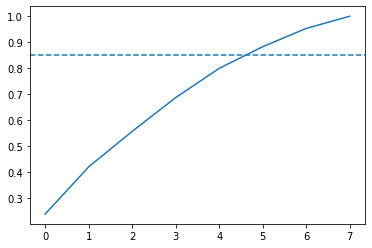

In [90]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(scaled_X_train)
exp_variance = pca.explained_variance_ratio_

import numpy as np

cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')


In [91]:

pca = PCA(n_components=6)

X_train_pca = pca.fit_transform(scaled_X_train)

X_test_pca = pca.fit_transform(scaled_X_test)

In [92]:

from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=10)

tree.fit(X_train_pca, y_train)

pred_labels_tree = tree.predict(X_test_pca)

In [93]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=10)
logreg.fit(X_train_pca, y_train)
pred_labels_logit = logreg.predict(X_test_pca)

from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test,pred_labels_tree)
class_rep_log = classification_report(y_test,pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.52      0.59      0.55       235
        Rock       0.90      0.87      0.88       966

    accuracy                           0.81      1201
   macro avg       0.71      0.73      0.72      1201
weighted avg       0.82      0.81      0.82      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.75      0.55      0.63       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.82      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [94]:
# A huge number of Rock Musics
print(echo_tracks.genre_top.value_counts())

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64


In [95]:

hop_only = echo_tracks.loc[echo_tracks['genre_top']=='Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top']=='Rock']

# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0],random_state=10)

rock_hop_bal = pd.concat([rock_only,hop_only])

print(rock_hop_bal.genre_top.value_counts())



Rock       910
Hip-Hop    910
Name: genre_top, dtype: int64


In [96]:

X = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
y = rock_hop_bal['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
X_test_pca = pca.transform(scaler.transform(X_test))

In [97]:

tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_pca,y_train)
pred_labels_tree = tree.predict(X_test_pca)


logreg = LogisticRegression(random_state=10)
logreg.fit(X_train_pca,y_train)
pred_labels_logit = logreg.predict(X_test_pca)

print("Decision Tree: \n", classification_report(y_test,pred_labels_tree))
print("Logistic Regression: \n", classification_report(y_test,pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455

